In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [5]:
def get_filename(base_name, seed):
    return base_name + '-seed' + str(seed) + '.npy'

def get_mean_mtx(base_name, max_seed):
    cum = np.load(get_filename(base_name, 1))

    if max_seed > 1:
        for seed in range(2, max_seed+1):
            cum += np.load(get_filename(base_name, seed))
    
    return cum / max_seed

## Split MNIST

In [3]:
MAX_SEED = 3

# Just VCL
split_vcl = get_mean_mtx('VCL-split', MAX_SEED)
# Just VCL + VGR
split_vcl_vgr = get_mean_mtx('VCL-split-with-VGR', MAX_SEED)

# VCL + Random Coreset
split_vcl_randCore = get_mean_mtx('VCL-all-split-randcoreset', MAX_SEED)
# VCL + Random Coreset + VGR
split_vcl_randCore_vgr = get_mean_mtx('VCL-all-split-randcoreset-VGR', MAX_SEED)

# VCL + Kcenter Coreset
split_vcl_kcen = get_mean_mtx('VCL-all-split-kCenterCoreset', MAX_SEED)
# VCL + Kcenter Coreset + VGR
split_vcl_kcen_vgr = get_mean_mtx('VCL-all-split-kCenterCoreset-VGR', MAX_SEED)

# Coreset only
split_only_rand_core = get_mean_mtx('rand-coreset-only-split', MAX_SEED)

# Kcenter only
split_only_kcen_core = get_mean_mtx('kcen-coreset-only-split', MAX_SEED)

In [5]:
split_vcl_vals = np.nanmean(split_vcl, axis=1)
split_vcl_vgr_vals = np.nanmean(split_vcl_vgr, axis=1)
split_vcl_randCore_vals = np.nanmean(split_vcl_randCore, axis=1)
split_vcl_randCore_vgr_vals = np.nanmean(split_vcl_randCore_vgr, axis=1)
split_vcl_kcen_vals = np.nanmean(split_vcl_kcen, axis=1)
split_vcl_kcen_vgr_vals = np.nanmean(split_vcl_kcen_vgr, axis=1)
split_only_rand_core_vals = np.nanmean(split_only_rand_core, axis=1)
split_only_kcen_core_vals = np.nanmean(split_only_kcen_core, axis=1)

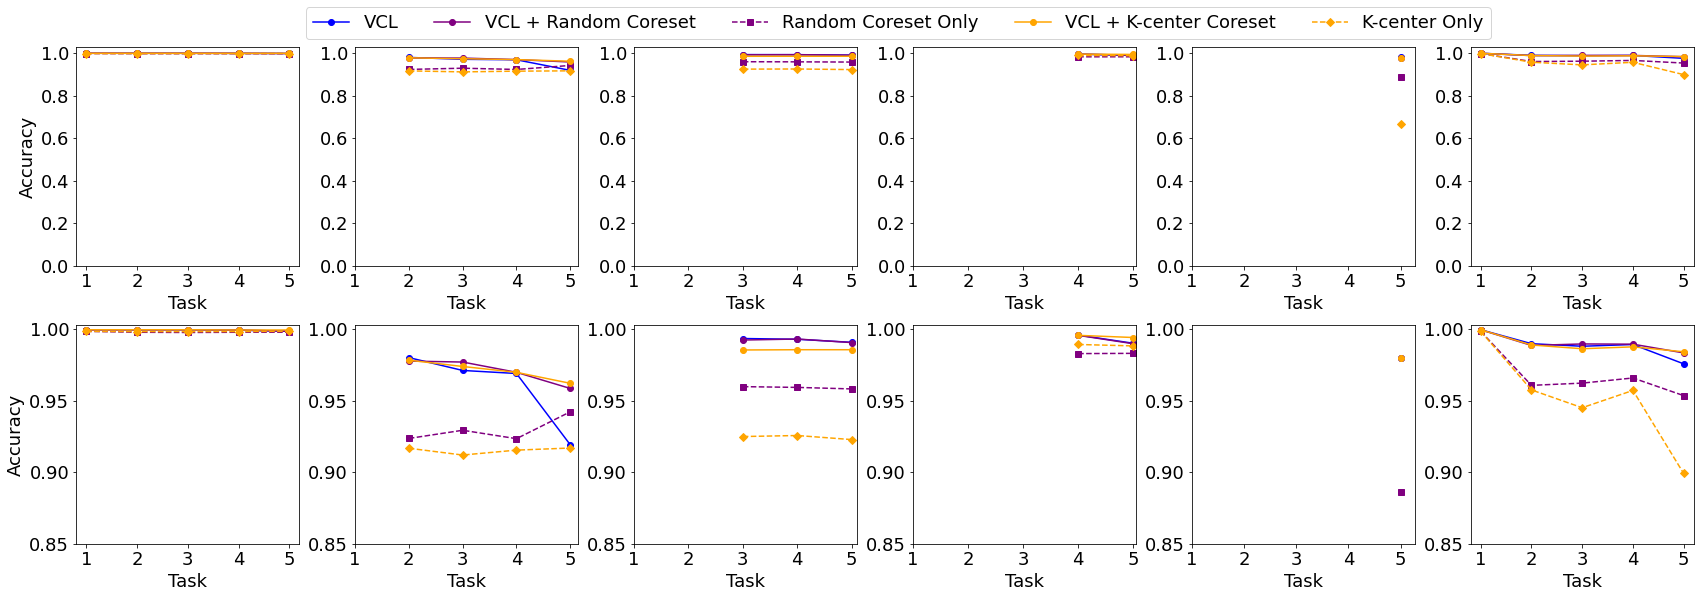

In [43]:
NROWS = 2
NCOLS = 6
fig, ax = plt.subplots(NROWS, NCOLS, figsize=(24,8))

for i in range(NROWS):
    for idx in range(NCOLS-1): # -1 because of 'average plot' not included
        ax[i,idx].plot(range(1+idx,len(split_vcl[:,idx])+1), split_vcl[idx:,idx], '-o', label='VCL', color='blue')
        ax[i,idx].plot(range(1+idx,len(split_vcl_randCore[:,idx])+1), split_vcl_randCore[idx:,idx], '-o', label='VCL + Random Coreset', color='purple')
        ax[i,idx].plot(range(1+idx,len(split_only_rand_core[:,idx])+1), split_only_rand_core[idx:,idx], '--s', label='Random Coreset Only', color='purple')
        ax[i,idx].plot(range(1+idx,len(split_vcl_kcen[:,idx])+1), split_vcl_kcen[idx:,idx], '-o', label='VCL + K-center Coreset', color='orange')
        ax[i,idx].plot(range(1+idx,len(split_only_kcen_core[:,idx])+1), split_only_kcen_core[idx:,idx], '--D', label='K-center Only', color='orange')
        ax[i,idx].set_xlabel("Task", fontsize=18)

for i in range(NROWS):
    ax[i,NCOLS-1].plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
    ax[i,NCOLS-1].plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
    ax[i,NCOLS-1].plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
    ax[i,NCOLS-1].plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
    ax[i,NCOLS-1].plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='orange')
    ax[i,NCOLS-1].set_xlabel("Task", fontsize=18)

ax[0,0].set_ylabel("Accuracy", fontsize=18)
ax[1,0].set_ylabel("Accuracy", fontsize=18)

fig.tight_layout(pad=2)

for j in range(6):
    ax[0,j].set_ylim(0, 1.03)
    ax[0,j].set_xticks(np.arange(1, 6, 1.0))
    ax[0,j].tick_params(labelsize=18)

for j in range(6):
    ax[1,j].set_ylim(0.85, 1.003)
    ax[1,j].set_xticks(np.arange(1, 6, 1.0))
    ax[1,j].tick_params(labelsize=18)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines = lines_labels[0][0]
labels = lines_labels[0][1]

fig.legend(lines, labels, bbox_to_anchor= (0.18, 1.05), ncol=6, loc="upper left", prop={'size': 18})

plt.show()

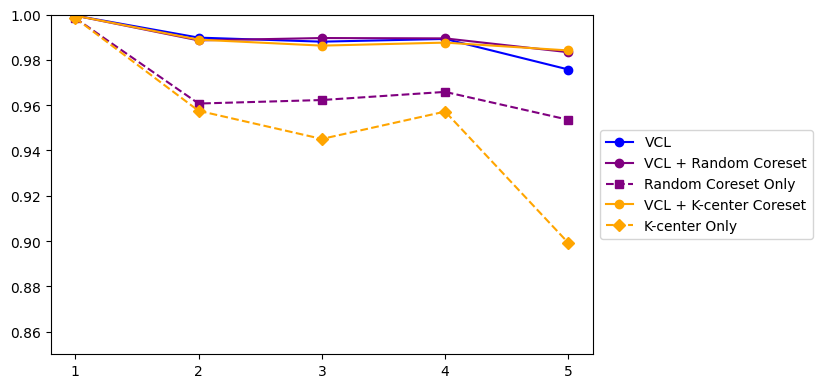

In [22]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
plt.plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
plt.plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='orange')

plt.ylim(0.85, 1)
plt.xticks(np.arange(1, 6, 1.0))
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.show()

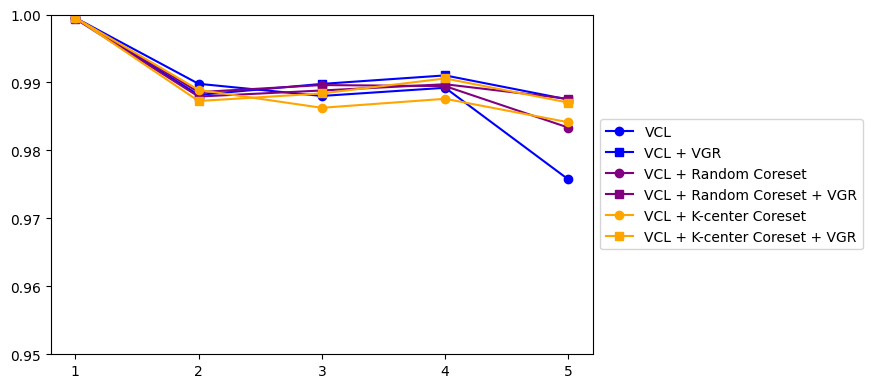

In [9]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
plt.plot(range(1,len(split_vcl_vgr_vals)+1), split_vcl_vgr_vals, '-s', label='VCL + VGR', color='blue')
plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
plt.plot(range(1,len(split_vcl_randCore_vgr_vals)+1), split_vcl_randCore_vgr_vals, '-s', label='VCL + Random Coreset + VGR', color='purple')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
plt.plot(range(1,len(split_vcl_kcen_vgr_vals)+1), split_vcl_kcen_vgr_vals, '-s', label='VCL + K-center Coreset + VGR', color='orange')

plt.ylim(0.95, 1)
plt.xticks(np.arange(1, 6, 1.0))
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.show()

## Permuted MNIST

In [25]:
# Just VCL
perm_vcl = np.load('VCL.npy')
# VCL + Random Coreset
perm_vcl_randCore_200 = np.load('rand-VCL-200_seed1.npy')
perm_vcl_randCore_400 = np.load('rand-VCL-400_seed1.npy')
perm_vcl_randCore_1000 = np.load('rand-VCL-1000_seed1.npy')
perm_vcl_randCore_2500 = np.load('rand-VCL-2500_seed1.npy')
perm_vcl_randCore_5000 = np.load('rand-VCL-5000_seed1.npy')
# VCL + K-center Coreset
perm_vcl_kcen = np.load('kcen-VCL200_seed1.npy')
# Only Coreset
perm_only_core_200 = np.load('only-coreset-200_seed1.npy')
perm_only_core_400 = np.load('only-coreset-400_seed1.npy')
perm_only_core_1000 = np.load('only-coreset-1000_seed1.npy')
perm_only_core_2500 = np.load('only-coreset-2500_seed1.npy')
perm_only_core_5000 = np.load('only-coreset-5000_seed1.npy')
# K-center Coreset Only
perm_kcen_coreset_only = np.load('kcen-coreset-only200_seed1.npy')


In [26]:
perm_vcl_vals = np.nanmean(perm_vcl, axis=1)

perm_vcl_randCore_200_vals = np.nanmean(perm_vcl_randCore_200, axis=1)
perm_vcl_randCore_400_vals = np.nanmean(perm_vcl_randCore_400, axis=1)
perm_vcl_randCore_1000_vals = np.nanmean(perm_vcl_randCore_1000, axis=1)
perm_vcl_randCore_2500_vals = np.nanmean(perm_vcl_randCore_2500, axis=1)
perm_vcl_randCore_5000_vals = np.nanmean(perm_vcl_randCore_5000, axis=1)

perm_vcl_kcen_vals = np.nanmean(perm_vcl_kcen, axis=1)

perm_only_core_200_vals = np.nanmean(perm_only_core_200, axis=1)
perm_only_core_400_vals = np.nanmean(perm_only_core_400, axis=1)
perm_only_core_1000_vals = np.nanmean(perm_only_core_1000, axis=1)
perm_only_core_2500_vals = np.nanmean(perm_only_core_2500, axis=1)
perm_only_core_5000_vals = np.nanmean(perm_only_core_5000, axis=1)

perm_kcen_coreset_only_vals = np.nanmean(perm_kcen_coreset_only, axis=1)


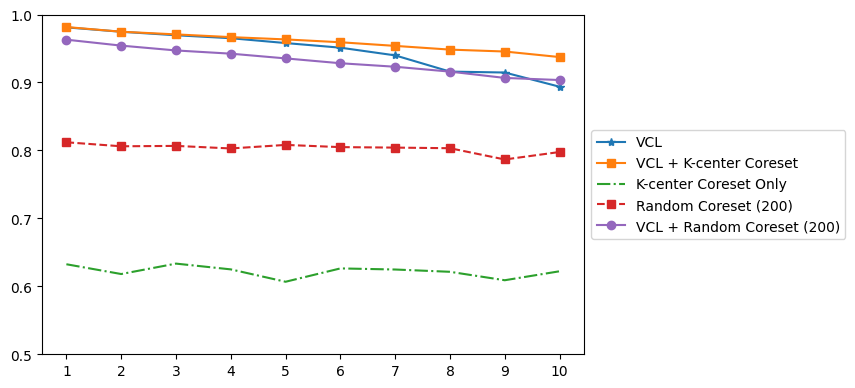

In [27]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(perm_vcl_vals)+1), perm_vcl_vals, '-*', label='VCL')
plt.plot(range(1,len(perm_vcl_kcen_vals)+1), perm_vcl_kcen_vals, '-s', label='VCL + K-center Coreset')
plt.plot(range(1,len(perm_kcen_coreset_only_vals)+1), perm_kcen_coreset_only_vals, '-.', label='K-center Coreset Only')
plt.plot(range(1,len(perm_only_core_200_vals)+1), perm_only_core_200_vals, '--s', label='Random Coreset (200)')
plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '-o', label='VCL + Random Coreset (200)')

plt.ylim(0.5, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.show()

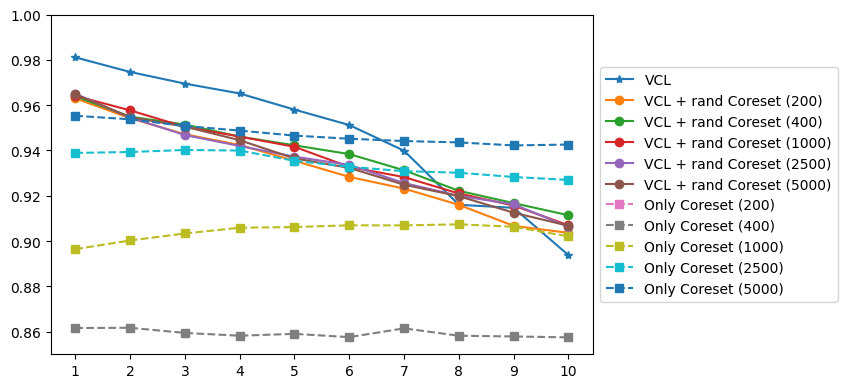

In [28]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(perm_vcl_vals)+1), perm_vcl_vals, '-*', label='VCL')

plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '-o', label='VCL + rand Coreset (200)')
plt.plot(range(1,len(perm_vcl_randCore_400_vals)+1), perm_vcl_randCore_400_vals, '-o', label='VCL + rand Coreset (400)')
plt.plot(range(1,len(perm_vcl_randCore_1000_vals)+1), perm_vcl_randCore_1000_vals, '-o', label='VCL + rand Coreset (1000)')
plt.plot(range(1,len(perm_vcl_randCore_2500_vals)+1), perm_vcl_randCore_2500_vals, '-o', label='VCL + rand Coreset (2500)')
plt.plot(range(1,len(perm_vcl_randCore_5000_vals)+1), perm_vcl_randCore_5000_vals, '-o', label='VCL + rand Coreset (5000)')

plt.plot(range(1,len(perm_only_core_200_vals)+1), perm_only_core_200_vals, '--s', label='Only Coreset (200)')
plt.plot(range(1,len(perm_only_core_400_vals)+1), perm_only_core_400_vals, '--s', label='Only Coreset (400)')
plt.plot(range(1,len(perm_only_core_1000_vals)+1), perm_only_core_1000_vals, '--s', label='Only Coreset (1000)')
plt.plot(range(1,len(perm_only_core_2500_vals)+1), perm_only_core_2500_vals, '--s', label='Only Coreset (2500)')
plt.plot(range(1,len(perm_only_core_5000_vals)+1), perm_only_core_5000_vals, '--s', label='Only Coreset (5000)')


plt.ylim(0.85, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.show()

In [30]:
# VCL + Random Coreset no VGR
perm_vcl_randCore_novgr_200 = np.load('new_VGR_exp/rand-VCL-nonvgr200.npy')
perm_vcl_randCore_novgr_400 = np.load('new_VGR_exp/rand-VCL-nonvgr400.npy')
perm_vcl_randCore_novgr_1000 = np.load('new_VGR_exp/rand-VCL-nonvgr1000.npy')
perm_vcl_randCore_novgr_2500 = np.load('new_VGR_exp/rand-VCL-nonvgr2500.npy')
perm_vcl_randCore_novgr_5000 = np.load('new_VGR_exp/rand-VCL-nonvgr5000.npy')

perm_vcl_randCore_novgr_200_vals = np.nanmean(perm_vcl_randCore_novgr_200, axis=1)
perm_vcl_randCore_novgr_400_vals = np.nanmean(perm_vcl_randCore_novgr_400, axis=1)
perm_vcl_randCore_novgr_1000_vals = np.nanmean(perm_vcl_randCore_novgr_1000, axis=1)
perm_vcl_randCore_novgr_2500_vals = np.nanmean(perm_vcl_randCore_novgr_2500, axis=1)
perm_vcl_randCore_novgr_5000_vals = np.nanmean(perm_vcl_randCore_novgr_5000, axis=1)

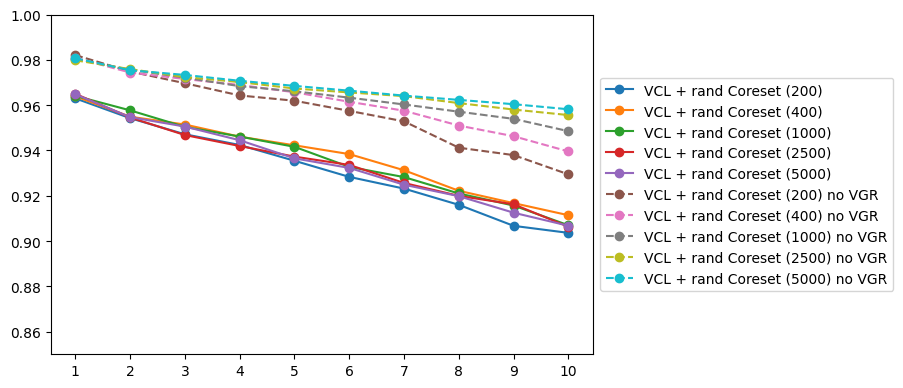

In [33]:
figure(figsize=(7, 4.5), dpi=100)

plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '-o', label='VCL + rand Coreset (200)')
plt.plot(range(1,len(perm_vcl_randCore_400_vals)+1), perm_vcl_randCore_400_vals, '-o', label='VCL + rand Coreset (400)')
plt.plot(range(1,len(perm_vcl_randCore_1000_vals)+1), perm_vcl_randCore_1000_vals, '-o', label='VCL + rand Coreset (1000)')
plt.plot(range(1,len(perm_vcl_randCore_2500_vals)+1), perm_vcl_randCore_2500_vals, '-o', label='VCL + rand Coreset (2500)')
plt.plot(range(1,len(perm_vcl_randCore_5000_vals)+1), perm_vcl_randCore_5000_vals, '-o', label='VCL + rand Coreset (5000)')

plt.plot(range(1,len(perm_vcl_randCore_novgr_200_vals)+1), perm_vcl_randCore_novgr_200_vals, '--o', label='VCL + rand Coreset (200) no VGR')
plt.plot(range(1,len(perm_vcl_randCore_novgr_400_vals)+1), perm_vcl_randCore_novgr_400_vals, '--o', label='VCL + rand Coreset (400) no VGR')
plt.plot(range(1,len(perm_vcl_randCore_novgr_1000_vals)+1), perm_vcl_randCore_novgr_1000_vals, '--o', label='VCL + rand Coreset (1000) no VGR')
plt.plot(range(1,len(perm_vcl_randCore_novgr_2500_vals)+1), perm_vcl_randCore_novgr_2500_vals, '--o', label='VCL + rand Coreset (2500) no VGR')
plt.plot(range(1,len(perm_vcl_randCore_novgr_5000_vals)+1), perm_vcl_randCore_novgr_5000_vals, '--o', label='VCL + rand Coreset (5000) no VGR')

plt.ylim(0.85, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.show()